**Task 36-> Implement with TensorFlow/Keras**

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

**Loading and Filter the Dataset for Specific Classes**

In [5]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

selected_classes = [0, 1, 2]  # airplane, automobile, bird

# Filter the training data
train_filter = np.isin(train_labels, selected_classes).flatten()
train_images, train_labels = train_images[train_filter], train_labels[train_filter]

# Filter the test data
test_filter = np.isin(test_labels, selected_classes).flatten()
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Map the labels to a range starting from 0
train_labels = np.array([np.where(selected_classes == x)[0][0] for x in train_labels])
test_labels = np.array([np.where(selected_classes == x)[0][0] for x in test_labels])

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


**Building the CNN Model**

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(selected_classes))  # Update this to the number of classes (3 in this case)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the Model**

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


**Training the Model**

In [8]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.6481 - loss: 0.7637 - val_accuracy: 0.8280 - val_loss: 0.4393
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.8202 - loss: 0.4556 - val_accuracy: 0.8457 - val_loss: 0.3885
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8587 - loss: 0.3626 - val_accuracy: 0.8650 - val_loss: 0.3360
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.8759 - loss: 0.3222 - val_accuracy: 0.8573 - val_loss: 0.3431
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8903 - loss: 0.2792 - val_accuracy: 0.8803 - val_loss: 0.3077
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9019 - loss: 0.2469 - val_accuracy: 0.8760 - val_loss: 0.3185
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9214 - loss: 0.2132 - val_accuracy: 0.8900 - val_loss: 0.2970
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9225 - loss: 0.1947 - 

**Evaluating the Model**

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

94/94 - 1s - 14ms/step - accuracy: 0.8833 - loss: 0.3404

Test accuracy: 0.8833333253860474


**Plot Training and Validation Accuracy**

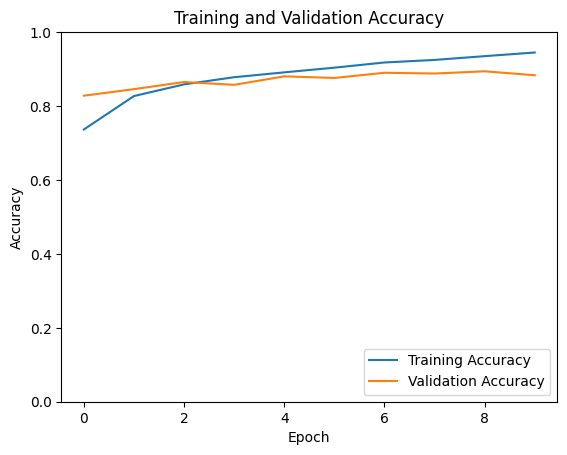

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
